In [1]:
# -------------------------------------------------------
# Chapter 3 Work
# -------------------------------------------------------



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns


In [3]:
# get data

auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
auto[auto.horsepower != is.numeric()] = 1

SyntaxError: invalid syntax (<ipython-input-41-e452171cc189>, line 1)

In [65]:
#Q8.a

#auto_ols_mod = sm.ols('y~x', data =auto).fit()
auto_ols_mod = sm.ols(formula = 'mpg ~ weight', data = auto).fit()

print(auto_ols_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     886.6
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          5.37e-103
Time:                        08:43:26   Log-Likelihood:                -1146.0
No. Observations:                 397   AIC:                             2296.
Df Residuals:                     395   BIC:                             2304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.796     58.166      0.0

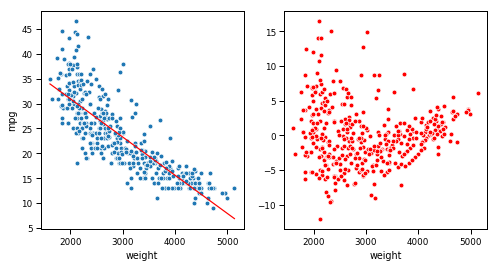

In [68]:
# plot data from Q8
sns.set_context('paper', rc = {'font.sans-serif': 'Helvetica-Neue', })

fig, axs = plt.subplots(1,2, figsize = (8,4))
sns.scatterplot(x = 'weight', y = 'mpg', data = auto, ax = axs[0])
sns.lineplot(x = 'weight', y = auto_ols_mod.fittedvalues, color= 'red', data = auto, ax =axs[0])
sns.scatterplot(x = 'weight', y = auto_ols_mod.resid, color= 'red', data = auto, ax =axs[1])

plt.show()

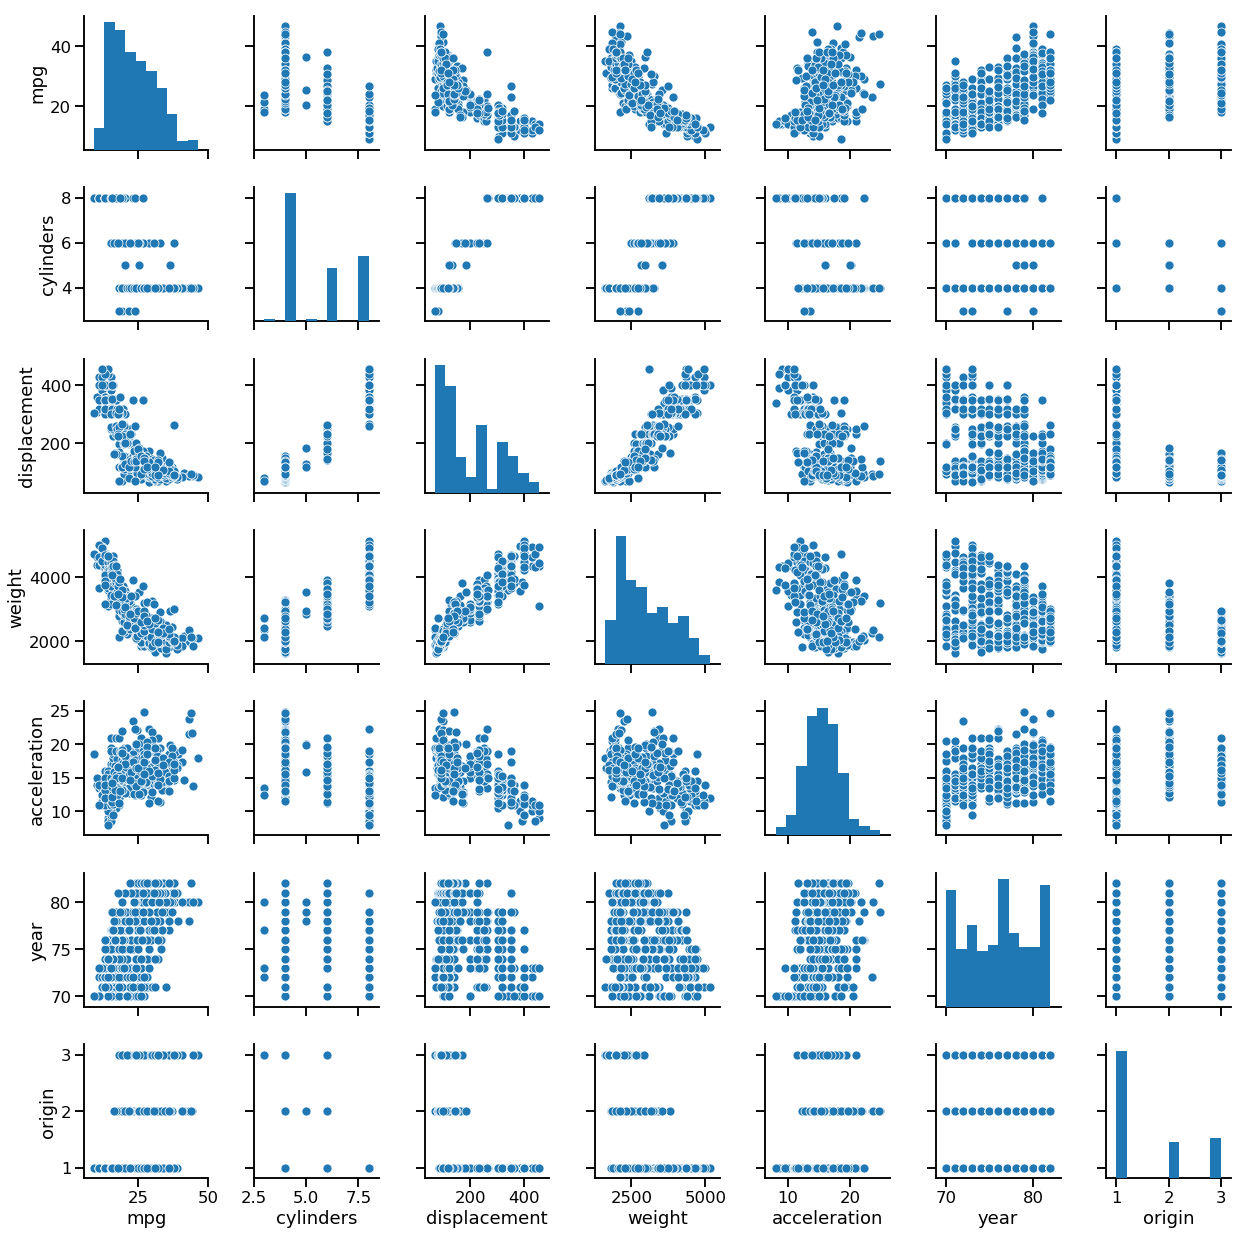

In [69]:
#Q 9

#fig, axs = plt.subplots(1,1)
sns.set_context('talk', rc = {'font.sans-serif': 'Helvetica-Neue'})

sns.pairplot(data = auto)

plt.show()

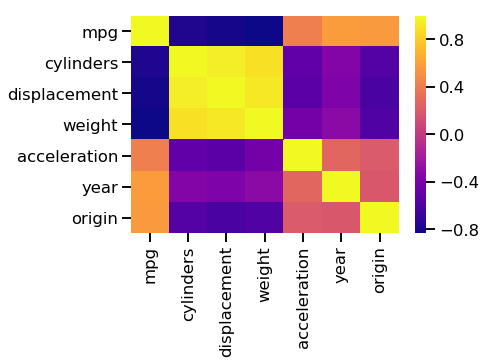

In [72]:
# correlation matrix on auto

corr = auto.corr()

sns.heatmap(data= corr, xticklabels= corr.columns, yticklabels= corr.columns, cmap = 'plasma')

In [4]:
auto_mols_model = sm.ols('mpg ~ cylinders + displacement + weight + acceleration + year + origin', data = auto).fit()

auto_mols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     298.9
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          1.72e-142
Time:                        09:19:10   Log-Likelihood:                -1037.7
No. Observations:                 397   AIC:                             2089.
Df Residuals:                     390   BIC:                             2117.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.1358      4.145     -4.858      0.000     -28.286     -11.986
cylinders       -0.4198      0.320     -1.311      0.191      -1.049       0.210
displacement     0.0174      0.007      2.423      0.016       0.003       0.032
weight          -0.0069      0.001    -11.983      0.000      -0.008      -0.006
acceleration     0.1591      0.077      2.055      0.041       0.007       0.311
year             0.7703      0.049     15.613      0.000       0.673       0.867
origin           1.3560      0.269      5.040      0.000       0.827       1.885
==============================================================================
Omnibus:                       29.082   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.906
Skew:                           0.494   Prob(JB):                     6.52e-11
Kurtosis:                       4.363   Cond. No.                     7.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

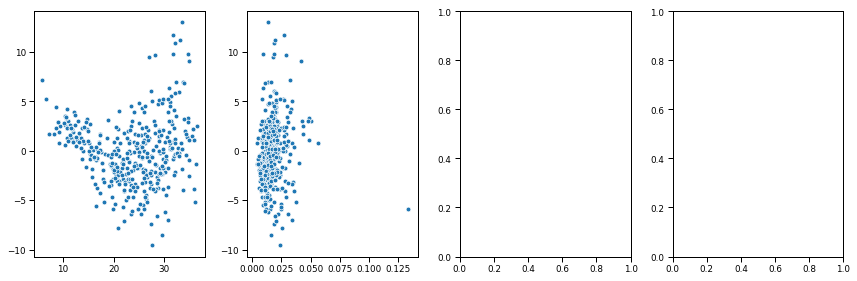

In [97]:
sns.set_context('paper')

fig, axs = plt.subplots(1,4, figsize=(12,4))
#residual plot
sns.scatterplot(x = auto_mols_model.fittedvalues, y= auto_mols_model.resid, data = auto, ax =axs[0])

#leverage plot
sns.scatterplot(x = auto_mols_model.get_influence().hat_matrix_diag, y= auto_mols_model.resid, data = auto, ax =axs[1])

plt.tight_layout()

In [108]:
auto_mols_model = sm.ols('mpg ~ cylinders + displacement + weight + acceleration + year*origin', data = auto).fit()

print(auto_mols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          9.38e-144
Time:                        09:44:00   Log-Likelihood:                -1031.7
No. Observations:                 397   AIC:                             2079.
Df Residuals:                     389   BIC:                             2111.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8115      8.845      0.770   

In [6]:
auto_mols_model = sm.ols('np.sqrt(mpg) ~ weight', data = auto).fit()

Y = np.sqrt(auto['mpg'])
print(auto_mols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.sqrt(mpg)   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1097.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          4.98e-116
Time:                        09:24:32   Log-Likelihood:                -212.52
No. Observations:                 397   AIC:                             429.0
Df Residuals:                     395   BIC:                             437.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1977      0.076     94.903      0.0

Text(0.5, 0.98, 'sqrt(Y) plot')

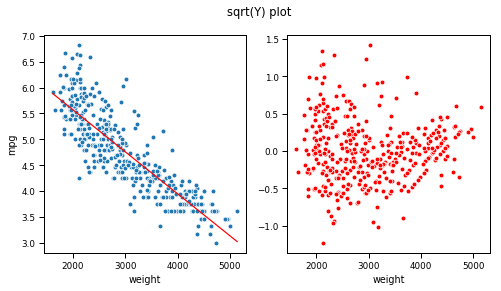

In [7]:
# plot data from Q8
sns.set_context('paper', rc = {'font.sans-serif': 'Helvetica-Neue', })

fig, axs = plt.subplots(1,2, figsize = (8,4))
sns.scatterplot(x = 'weight', y = Y, data = auto, ax = axs[0])
sns.lineplot(x = 'weight', y = auto_mols_model.fittedvalues, color= 'red', data = auto, ax =axs[0])
sns.scatterplot(x = 'weight', y = auto_mols_model.resid, color= 'red', data = auto, ax =axs[1])

plt.suptitle('sqrt(Y) plot')

In [15]:
# ----------------------------------------------------------------------------------
# Q10 on carseats
# ----------------------------------------------------------------------------------

#read in csv file
df = pd.read_csv('carseats.csv')
df.head()

#clean up data by dropping NaN rows that were imported
df = df.dropna()
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138.0,73.0,11.0,276.0,120.0,Bad,42.0,17.0,Yes,Yes
3,11.22,111.0,48.0,16.0,260.0,83.0,Good,65.0,10.0,Yes,Yes
5,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59.0,12.0,Yes,Yes
7,7.40,117.0,100.0,4.0,466.0,97.0,Medium,55.0,14.0,Yes,Yes
9,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38.0,13.0,Yes,No


In [14]:
#Fit the multple ordinary least square model to the data

seat_mols_model = sm.ols('Sales ~ Price + Urban + US', data = df).fit()

print(seat_mols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           2.39e-23
Time:                        09:41:06   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [16]:
#Fit the multple ordinary least square model to the data

seat_mols_model = sm.ols('Sales ~ Price + US', data = df).fit()

print(seat_mols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           2.66e-24
Time:                        09:59:06   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

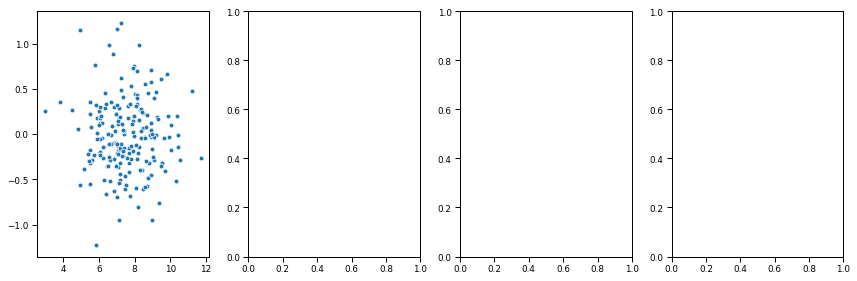

In [18]:
sns.set_context('paper')

fig, axs = plt.subplots(1,4, figsize=(12,4))
#residual plot
sns.scatterplot(x = seat_mols_model.fittedvalues, y= auto_mols_model.resid, data = df, ax =axs[0])

#leverage plot
#sns.scatterplot(x = seat_mols_model.get_influence().hat_matrix_diag, y= auto_mols_model.resid, data = df, ax =axs[1])

plt.tight_layout()

In [19]:
#-----------------------------------------------------------------
# Boston data set for Q15
# ---------------------------------------------------------------

df = pd.read_csv('boston.csv')

df = df.dropna()

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
# Fitting a model
df_results = []
df_single_line = []
#itterates over all the columns in the df
for col in df:
    #print(col)
    
    #Fit a simple linear regression between crim and a column
    model = sm.ols('crim ~' + " " + str(col), data = df).fit()
    #print(model.rsquared)
    df_single_line = pd.DataFrame({
        'Predictor' : [str(col)],
        'Rsquared' :  [str(model.rsquared) ]
    })
    
    df_results.append(df_single_line)

df_results = pd.concat(df_results, axis = 0)

df_results = df_results.round(1)

df_results

,Predictor,Rsquared
0,crim,1.0
0,zn,0.04018790803211081
0,indus,0.16531007043075163
0,chas,0.0031238689633055206
0,nox,0.17721718179269375
0,rm,0.048069116716083604
0,age,0.12442145175894659
0,dis,0.1441493749253986
0,rad,0.39125668674998926
0,tax,0.3396142433788121
